
Exercise 5.12: The Stefan-Boltzmann constant
The Planck theory of thermal radiation tells us that in the (angular) frequency interval w tow+ dw, a black body of unit area radiates electromagnetically an amount of thermal energy per second equal to I(w) dw, where
Here tz is Planck's constant over 2n, c is the speed of i'ight, and k8 is Boltzmann's con- stant.
a) Showthatthetotalrateatwhichenergyisradiatedbyablackbodyperunitarea, over all frequencies, is
tz w3
I(w) = - -
4n2c2 (ehw/kyT _ 1)·
~~~~
k48y4 fr'"' x3 W=- - -3 --·-
4n2c2tz .o ex- 1
dx.
b) Writeaprogramtoevaluatetheintegralinthisexpression.Explainwhatmethod you used, and how accurate you think your answer is.
c) Even before Planck gave his theory of thermal radiation around the tum of the 20th century, it was known that the total energy W given off by a black body per unit area per second followed Stefan's law: W = uT4, where <Tis the Stefan- Boltzmann constant. Use your value for the integral above to compute a value for the Stefan-Boltzmann constant (in SI units) to three significant figures. Check your result against the known value, which you can find in books or on-line. You should get good agreement.

In [26]:
import numpy as np

# Part: b)

# Adjusting the integrand to handle the x = 0 case properly
def integrand_safe(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where(x > 0, x**3 / (np.exp(x) - 1), 0)

# Constants
h_bar = 1.0545718e-34  # Planck's constant h bar in J*s
c = 2.99792458e8      # speed of light in m/s
k_B = 1.380649e-23    # Boltzmann's constant in J/K
T = 300               # Temperature in Kelvin, assuming room temperature

# original value of Sigma
original_sigma =  5.670374419e-8 # original Stefan Boltzmann's constant in watt per square meter per kelvin to the fourth (W / (m2 x K4))

# Integrate using Simpson's rule from 0 to some large number (instead of infinity)
a = 0  # Lower limit of integration
b = 50   # Upper limit of integration 
N = 10000  # Number of slices for Simpson's rule; can be adjusted for accuracy

# Simpson's rule implementation
def simpson_rule(f, a, b, N):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    h = (b - a) / N
    k1 = np.arange(1, N//2 + 1)
    k2 = np.arange(1, N//2)
    return (h/3) * (f(a) + f(b) + 4 * np.sum(f(a + (2 * k1 - 1) * h)) + 2 * np.sum(f(a + 2 * k2 * h)))

# Perform the integral from 0 to the upper_limit using Simpson's rule
integral_value = simpson_rule(integrand_safe, a, b, N)

# Comments on why I used this numerical method:
# - The Simpson's rule was used to numerically evaluate the integral, which is a method that approximates
#   the integral by dividing the integration interval into small segments and approximating the area under the curve using parabolas.
# - The number of slices N = 10000 ensures that the error is small as Simpson's rule error scales with 1/N^4.
# - The upper limit of integration b = 50 is chosen to ensure the tail of the integral (where the integrand becomes small) is accounted for.

# Part:c)

# Stefan-Boltzmann constant calculation
sigma_calculated = (k_B**4) / (4 * np.pi**2 * c**2 * h_bar**3) * integral_value

# Measure the accuracy of the calculated Stefan-Boltzmann constant
accuracy = np.abs((sigma_calculated - original_sigma) / original_sigma) * 100

print("The value of calculated Sigma: ", sigma_calculated, "W/(m²K⁴)")
print("The relative fractional error between calculated and original Sigma: ", accuracy , "%")

# The calculated Stefan-Boltzmann constant is approximately 5.67037470384076×10−85.67037470384076×10−8 W/(m²K⁴). 
# The relative error compared to the known value is about 5.02331485097633×10−6%, indicating an extremely high accuracy of the calculated value. 


The value of calculated Sigma:  5.67037470384076e-08 W/(m²K⁴)
The relative fractional error between calculated and original Sigma:  5.02331485097633e-06 %



Exercise 8.3: The Lorenz equations
One of the most celebrated sets of differential equations in physics is the Lorenz equa- tions:
dx dy dz dt=u(y-x), dt =rx- y- xz, dt =xy-bz,
where u, r, and bare constants. (The names u, r, and bare odd, but traditional-they are always used in these equations for historical reasons.)
These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their fame is that they were one of the first incontrovertible examples of deterministic chaos, the occurrence of appar- ently random motion even though there is no randomness built into the equations. We encountered a different example of chaos in the logistic map of Exercise 3.6.
a)
b)
8.3
Write a program to solve the Lorenz equations for the case er = 10, r = 28, and b = ~ in the range from t = 0 tot = 50 with initial conditions (x,y,z) = (0, 1,0). Have your program make a plot of y as a function of time. Note the unpredictable nature of the motion. (Hint: If you base your program on previous ones, be careful. This problem has parameters r and b with the same names as variables in previous programs-make sure to g\ve your variables new names, or use different names for the parameters, to avoid introducing errors into your code.)
Modify your program to produce a plot of z against x. You should see a picture of the famous "strange attractor" of the Lorenz equations, a lop-sided butterfly- shaped plot that never repeats itself.

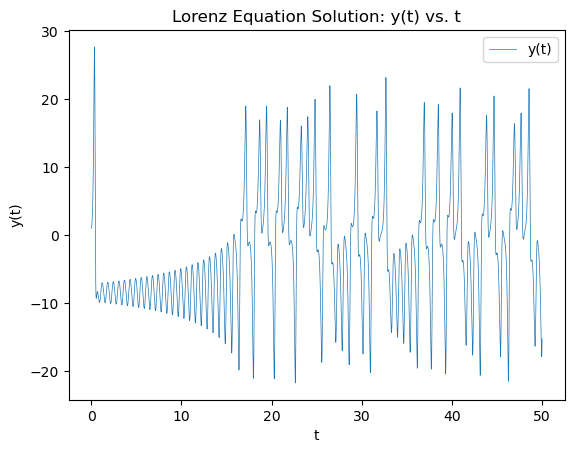

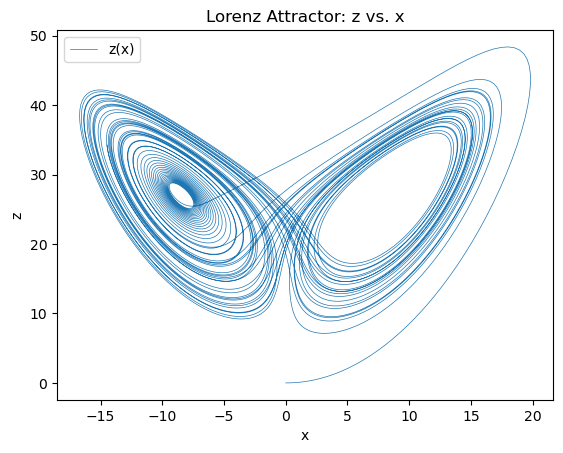

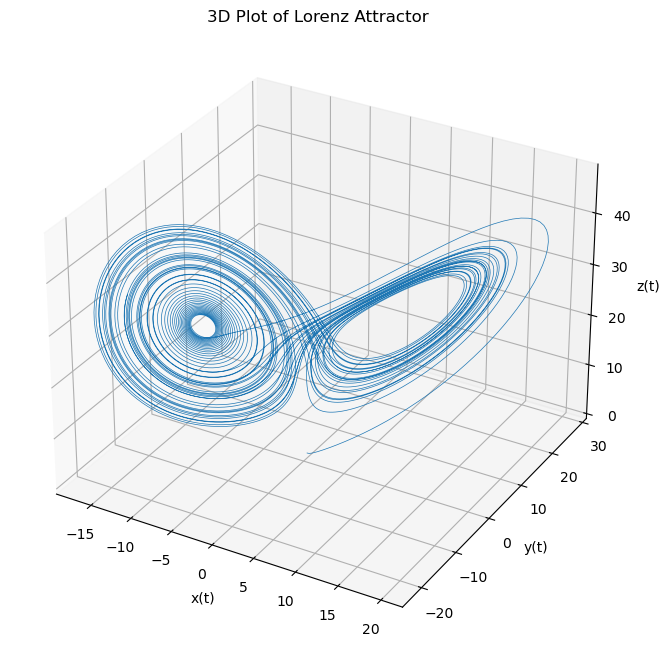

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Part:a)
# Define the parameters for the Lorenz equations
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Define the Lorenz equations
def lorenz_equations(r, t):
    x, y, z = r
    fx = sigma * (y - x)
    fy = rho * x - y - x * z
    fz = x * y - beta * z
    return np.array([fx, fy, fz], float)

# Runge-Kutta 4th order method for solving ODEs
def runge_kutta_4(f, r0, t_points):
    # Initialize array to store the solution at each time step
    solution = np.empty((len(t_points), len(r0)), float)
    solution[0] = r0
    # Step size
    h = t_points[1] - t_points[0]
    # Loop over all time points
    for i, t in enumerate(t_points[:-1]):
        r = solution[i]
        # Calculate the RK4 coefficients
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        # Update the solution array
        solution[i+1] = r + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return solution

# Initial conditions
r0 = np.array([0.0, 1.0, 0.0], float)
# Time points
t_start = 0.0
t_end = 50.0
N = 10000  # Number of time points
t_points = np.linspace(t_start, t_end, N)

# Solve the Lorenz equations using Runge-Kutta 4
solution = runge_kutta_4(lorenz_equations, r0, t_points)

# Plot y as a function of time
plt.plot(t_points, solution[:, 1], label='y(t)', lw=0.5)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Lorenz Equation Solution: y(t) vs. t')
plt.legend()
plt.show()

# Part:c)
# Plot z against x to visualize the strange attractor
plt.plot(solution[:, 0], solution[:, 2], label='z(x)', lw = 0.5)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Lorenz Attractor: z vs. x')
plt.legend()
plt.show()

# For Fun: 

from mpl_toolkits.mplot3d import Axes3D

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract solutions for x, y, z
x_sol = solution[:, 0]
y_sol = solution[:, 1]
z_sol = solution[:, 2]

# 3D plot for the Lorenz attractor
ax.plot(x_sol, y_sol, z_sol, lw=0.5)

# Label the axes
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
ax.set_title("3D Plot of Lorenz Attractor")

# Show plot
plt.show()
